Exploritory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/My Drive/Stock Prices - Days 0-365.xlsx'
df = pd.read_excel(file)

In [ ]:
#Cleaning Code
df = df.drop(df.columns[[0, 2]], axis=1)
df.columns = df.iloc[0]  # Set the first row as column names
df = df[1:].reset_index(drop = True)
prices = df.copy()
prices

,Day,HydroCorp,BrightFuture Rewables
0,0,101,99
1,1,101.019726,99.005479
2,2,101.040046,99.011839
3,3,101.060939,99.019041
4,4,101.082386,99.027051
...,...,...,...
361,361,115.466641,110.237432
362,362,115.495714,112.360217
363,363,115.484083,114.375834
364,364,115.433952,115.074964


In [ ]:
df['HydroCorp'] = df['HydroCorp'].pct_change()
df['BrightFuture Rewables'] = df['BrightFuture Rewables'].pct_change()
returns = df.dropna()
print(returns)

0    Day  HydroCorp  BrightFuture Rewables
1      1   0.000195               0.000055
2      2   0.000201               0.000064
3      3   0.000207               0.000073
4      4   0.000212               0.000081
5      5   0.000217               0.000089
..   ...        ...                    ...
361  361   0.000465               0.011865
362  362   0.000252               0.019256
363  363  -0.000101               0.017939
364  364  -0.000434               0.006113
365  365  -0.000545              -0.000266

[365 rows x 3 columns]


<ipython-input-141-ffb21c482db0>:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-141-ffb21c482db0>:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
fig = go.Figure()

# Add HydroCorp returns
fig.add_trace(go.Scatter(
    x=returns['Day'],
    y=returns['HydroCorp'] * 100,
    mode='lines+markers',
    name='HydroCorp',
    line=dict(color='blue')
))

# Add BrightFuture Renewables returns
fig.add_trace(go.Scatter(
    x=returns['Day'],
    y=returns['BrightFuture Rewables'] * 100,
    mode='lines+markers',
    name='BrightFuture Renewables',
    line=dict(color='green')
))

# Update layout
fig.update_layout(
    title='Daily Returns Comparison',
    xaxis_title='Date',
    yaxis_title='Return (%)',
    template='plotly_white',
    showlegend=True
)

fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=returns['HydroCorp'] * 100,  # Drop NaN values from returns
    nbinsx=200,  # Number of bins
    marker_color='blue',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Daily Returns',
    xaxis_title='Return (%)',
    yaxis_title='Frequency',
    template='plotly_white'
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=returns['BrightFuture Rewables'] * 100,  # Drop NaN values from returns
    nbinsx=1000,  # Number of bins
    marker_color='blue',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Daily Returns',
    xaxis_title='Return (%)',
    yaxis_title='Frequency',
    template='plotly_white'
)

fig.show()

In [ ]:
returns_Hydro = returns['HydroCorp']
mean = np.mean(returns_Hydro)  # First moment
variance = np.var(returns_Hydro, ddof=1)  # Second moment (sample variance)
skewness = skew(returns_Hydro)
excess_kurtosis = kurtosis(returns_Hydro)

print("Mean:", mean)
print("Variance:", variance)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)

Mean: 0.0003645768573119511
Variance: 7.158305856545243e-08
Skewness: -2.1540616895344256
Excess Kurtosis: 5.149033356724239


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
returns_BFR = returns['BrightFuture Rewables']
mean = np.mean(returns_BFR)  # First moment
variance = np.var(returns_BFR, ddof=1)  # Second moment (sample variance)
skewness = skew(returns_BFR)
excess_kurtosis = kurtosis(returns_BFR)

print("Mean:", mean)
print("Variance:", variance)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)

Mean: 0.00041481277943013857
Variance: 6.555972031916976e-06
Skewness: 7.511526760076548
Excess Kurtosis: 61.80934421181348


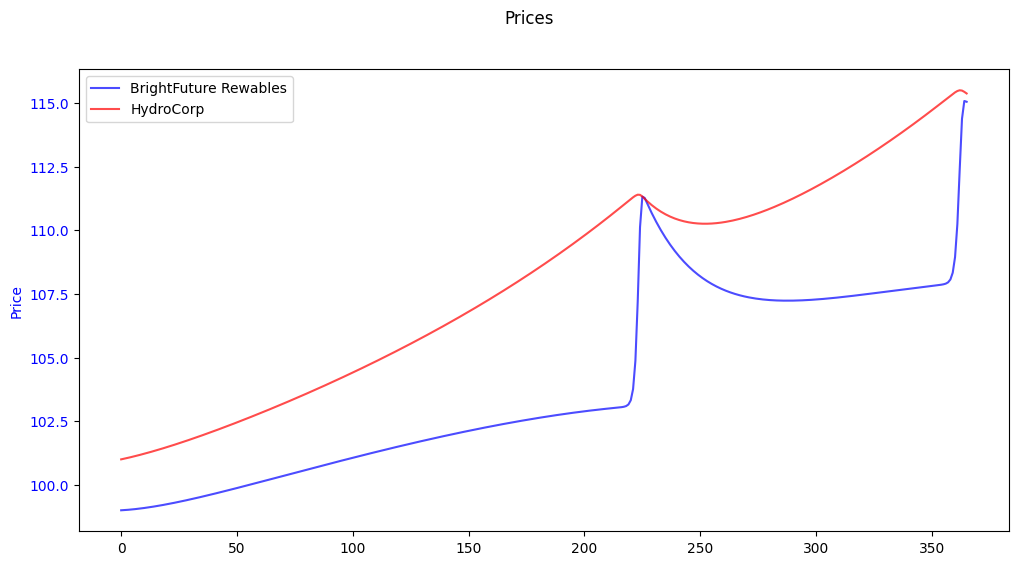

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(prices['BrightFuture Rewables'], label="BrightFuture Rewables", color="blue", alpha=0.7)
ax1.plot(prices['HydroCorp'], label="HydroCorp", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_hydro, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Add legend and title
fig.suptitle("Prices")
ax1.legend(loc="upper left")


# Show the plot
plt.show()

In [ ]:
def calculate_modified_rsi(prices, window=10, weighting_factor = 0.05):
    """
    Calculate the Relative Strength Index (RSI) where losses are defined as
    returns below the average return.

    Parameters:
        returns (list or np.ndarray): Series of returns.
        window (int): Look-back window for RSI calculation (default is 14).

    Returns:
        np.ndarray: Modified RSI values.
    """

    # Calculate the rolling average return (mean)
    delta = prices.diff()

    # Define gains and losses relative to the average return
    gain = np.where(delta > 0, delta * weighting_factor, 0)
    loss = np.where(delta < 0, -delta * (1 - weighting_factor), 0)

    # Calculate average gains and losses
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()

    # Compute RSI
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small epsilon to avoid division by zero
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
prices.diff().dropna()

,Day,HydroCorp,BrightFuture Rewables
1,1,0.019726,0.005479
2,1,0.02032,0.006359
3,1,0.020893,0.007202
4,1,0.021447,0.00801
5,1,0.021981,0.008784
...,...,...,...
361,1,0.053659,1.29265
362,1,0.029073,2.122785
363,1,-0.011631,2.015616
364,1,-0.05013,0.69913


In [ ]:
rsi_hydro = calculate_modified_rsi(prices['HydroCorp'], 5).dropna()
rsi_BFR = calculate_modified_rsi(prices['BrightFuture Rewables'], 5).dropna()
rsi_hydro

,0
0,0.000000
1,99.999980
2,99.999985
3,99.999987
4,99.999988
...,...
361,99.999997
362,99.999997
363,49.587416
364,11.183594


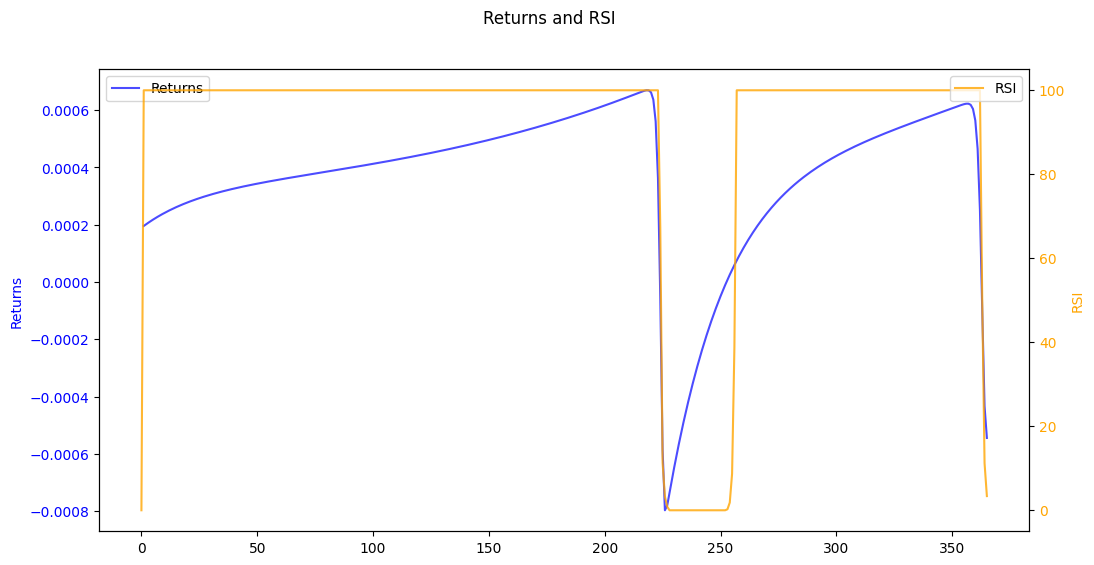

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_Hydro, label="Returns", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_hydro, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.plot(rsi_hydro, label="RSI", color="orange", alpha=0.8)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("Returns and RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

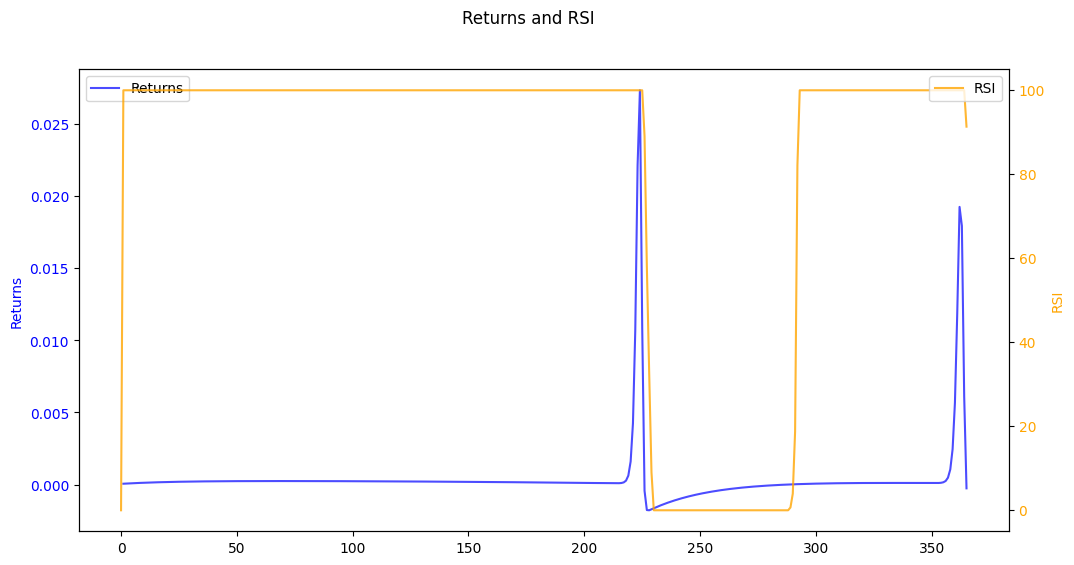

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_BFR, label="Returns", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.plot(rsi_BFR, label="RSI", color="orange", alpha=0.8)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("Returns and RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

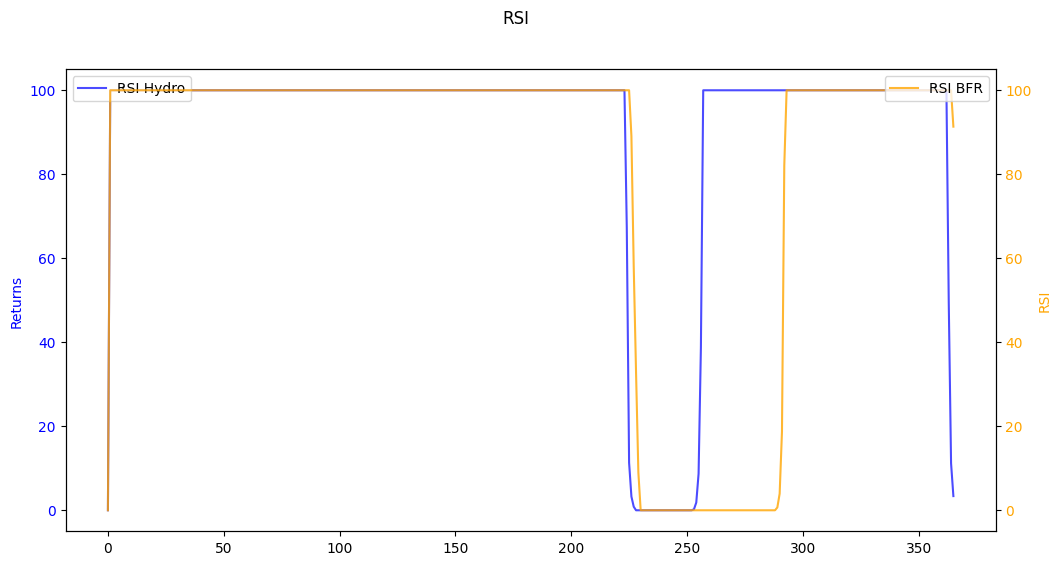

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(rsi_hydro, label="RSI Hydro", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.plot(rsi_BFR, label="RSI BFR", color="orange", alpha=0.8)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
a = rsi_hydro < rsi_BFR
a[a == True]

,0
221,True
222,True
223,True
224,True
225,True
226,True
227,True
228,True
229,True
359,True


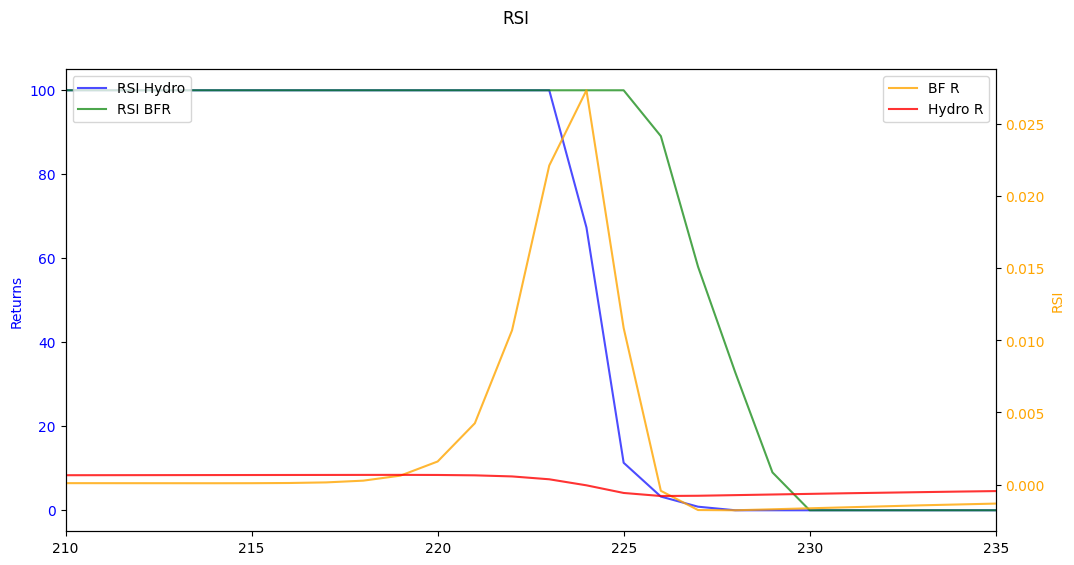

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(rsi_hydro, label="RSI Hydro", color="blue", alpha=0.7)
ax1.plot(rsi_BFR, label="RSI BFR", color="green", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.plot(returns_BFR, label="BF R", color="orange", alpha=0.8)
ax2.plot(returns_Hydro, label="Hydro R", color="red", alpha=0.8)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.set_xlim(210, 235)
# Show the plot
plt.show()

In [ ]:
def calculate_moving_average(data, period=10, type='SMA'):
  if type == 'SMA':
    return data.rolling(window=period).mean()
  elif type == 'EMA':
    return data.ewm(span=period, adjust=False).mean()

In [1]:
calculate_moving_average(prices_rsi)

NameError: name 'calculate_moving_average' is not defined

In [ ]:
avg_hydro = calculate_moving_average(rsi_hydro).dropna()
avg_hydro

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_Hydro, label="Returns", color="blue", alpha=0.7)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.plot(avg_hydro, label="RSI SMA", color="orange", alpha=0.8)
ax2.plot(calculate_moving_average(rsi_hydro, type = 'EMA').dropna(), label="RSI EMA", color="red", alpha=0.8)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("Returns and RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    short_ema = data.ewm(span=short_period, adjust=False).mean()
    long_ema = data.ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal

In [ ]:
macd, signal = calculate_macd(prices['HydroCorp'])

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_Hydro, label="Returns", color="blue", alpha=0.7)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.bar(macd.index, macd - signal, label='Histogram', color='green', alpha=0.6)
ax2.plot(macd, label="Macd", color="red", alpha=0.7)
ax2.plot(signal, label="Signal", color="orange", alpha=0.7)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("Returns and RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
macd, signal = calculate_macd(prices['BrightFuture Rewables'])

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_BFR, label="Returns", color="blue", alpha=0.7)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI
ax2 = ax1.twinx()
ax2.bar(macd.index, macd - signal, label='Histogram', color='green', alpha=0.6)
ax2.plot(macd, label="Macd", color="red", alpha=0.7)
ax2.plot(signal, label="Signal", color="orange", alpha=0.7)
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add legend and title
fig.suptitle("Returns and RSI")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
def volitlity(returns, window):
  return returns.rolling(window=window).std()

In [ ]:
vol_hydro = volitlity(returns_Hydro, 5)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(vol_hydro * 100, label="Vol", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(returns_Hydro, label="Returns", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax2.set_ylabel("Returns", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
def calculate_ewma(returns, span):
    """
    Calculate the Exponentially Weighted Moving Average (EWMA).

    Parameters:
        data (list or np.ndarray): The input data series.
        span (int): The lookback period for EWMA.

    Returns:
        pd.Series: EWMA values.
    """
    # Convert data to pandas Series for convenience

    # Calculate EWMA using pandas
    ewma = returns.ewm(span=span, adjust=False).mean()

    return ewma

In [ ]:
ewma_hydro = calculate_ewma(returns_Hydro, 10)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(ewma_hydro * 100, label="EWMA", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(returns_Hydro, label="Returns", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax2.set_ylabel("Returns", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
def calculate_bollinger_bands(returns, window=20):
    rolling_mean = pd.Series(returns).rolling(window).mean().dropna()
    rolling_std = pd.Series(returns).rolling(window).std().dropna()
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std
    return rolling_mean, upper_band, lower_band

In [ ]:
bol_hydro_m, bol_hydro_u, bol_hydro_d = calculate_bollinger_bands(returns_Hydro)
bol_BF_m, bol_BF_u, bol_BF_d = calculate_bollinger_bands(returns_BFR)
bol_hydro_m

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(bol_hydro_m, label="m", color="blue", alpha=0.7)
ax1.plot(bol_hydro_u, label="u", color="green", alpha=0.7)
ax1.plot(bol_hydro_d, label="d", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(returns_Hydro, label="Returns", color="orange", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax2.set_ylabel("Returns", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(bol_BF_m, label="m", color="blue", alpha=0.7)
ax1.plot(bol_BF_u, label="u", color="green", alpha=0.7)
ax1.plot(bol_BF_d, label="d", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.set_ylim(-0.025, 0.025)
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(returns_BFR, label="Returns", color="orange", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax2.set_ylabel("Returns", color="blue")
ax2.set_ylim(-0.05, 0.05)
ax2.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(returns_Hydro, label="Return Hydro", color="blue", alpha=0.7)
ax1.plot(returns_BFR, label="Return BFR", color="red", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
# Show the plot
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(rsi_hydro, label="Hydro RSI", color="blue", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax1.set_ylabel("Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(rsi_BFR, label="BFR RSI", color="orange", alpha=0.7)
#ax1.plot(pct_change_RSI_BFR, label="pct_change_RSI", color="red", alpha=0.8)
ax2.set_ylabel("Returns", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Create a twin y-axis for RSI

# Add legend and title
fig.suptitle("Returns and AVG")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
def volitility (returns, window = 20):
      return pd.Series(returns).rolling(window, min_periods = 1).std() * 100

In [ ]:
vol_h = volitility(returns_Hydro, window = 10)
crash_ind = vol_h > 2.5 * vol_h.shift(1)
crash_ind[crash_ind ==  True]

In [ ]:
vol_h = volitility(returns_BFR, window = 10)
crash_ind = vol_h > 2.5 * vol_h.shift(1)
crash_ind[crash_ind ==  True]

Possibilities:
- Moving Averages
- RSI
- MACD
- Volitility

In [ ]:
!python /content/drive/MyDrive/Colab\ Notebooks/QFC_fin_modelling_template.py

You bought shares of HydroCorp, at a price of: 100
Returns h Today: nan
Returns BF Today: nan
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF Today: 0.0
99502.48756218905
Returns h Today: 0.0
Returns BF To

Final Stat:

We hold H unless the returns are negative

only switch to BF if we have a high vol event and positive momentum
sell once momentum slows and it starts to peak

This strategy is prone to some weaknesses:
- mainly if BF outgrows h
- also if the shocks remain very volitile for long periods of time post shock
- avoiding negative shocks to both compaies

